In [1]:
import sys
sys.path.append('src')
from src.data_loading import load_datafiles


df = load_datafiles()
selected_data_info = df[df["bearing_type"].isin(["DE", "FE", "Normal"])]

print(f"筛选出 {len(selected_data_info)} 个 DE/FE/Normal 文件")
display(selected_data_info)


总共加载了 161 个数据文件
                                           file_path    filename  \
0  E:/python_file/TransBearingDiag/src/data/sourc...  B007_0.mat   
1  E:/python_file/TransBearingDiag/src/data/sourc...  B007_1.mat   
2  E:/python_file/TransBearingDiag/src/data/sourc...  B007_2.mat   
3  E:/python_file/TransBearingDiag/src/data/sourc...  B007_3.mat   
4  E:/python_file/TransBearingDiag/src/data/sourc...  B014_0.mat   

   sampling_freq bearing_type bearing_model fault_type fault_size load  
0          12000           DE       SKF6205      滚动体故障        007    0  
1          12000           DE       SKF6205      滚动体故障        007    1  
2          12000           DE       SKF6205      滚动体故障        007    2  
3          12000           DE       SKF6205      滚动体故障        007    3  
4          12000           DE       SKF6205      滚动体故障        014    0  
筛选出 161 个 DE/FE/Normal 文件


,file_path,filename,sampling_freq,bearing_type,bearing_model,fault_type,fault_size,load
0,E:/python_file/TransBearingDiag/src/data/sourc...,B007_0.mat,12000,DE,SKF6205,滚动体故障,007,0
1,E:/python_file/TransBearingDiag/src/data/sourc...,B007_1.mat,12000,DE,SKF6205,滚动体故障,007,1
2,E:/python_file/TransBearingDiag/src/data/sourc...,B007_2.mat,12000,DE,SKF6205,滚动体故障,007,2
3,E:/python_file/TransBearingDiag/src/data/sourc...,B007_3.mat,12000,DE,SKF6205,滚动体故障,007,3
4,E:/python_file/TransBearingDiag/src/data/sourc...,B014_0.mat,12000,DE,SKF6205,滚动体故障,014,0
...,...,...,...,...,...,...,...,...
156,E:/python_file/TransBearingDiag/src/data/sourc...,OR021@6_3.mat,48000,DE,SKF6205,外圈故障,021,3
157,E:/python_file/TransBearingDiag/src/data/sourc...,N_0.mat,48000,Normal,None,正常,None,0
158,E:/python_file/TransBearingDiag/src/data/sourc...,N_1_(1772rpm).mat,48000,Normal,None,正常,None,(1772rpm)
159,E:/python_file/TransBearingDiag/src/data/sourc...,N_2_(1750rpm).mat,48000,Normal,None,正常,None,(1750rpm)


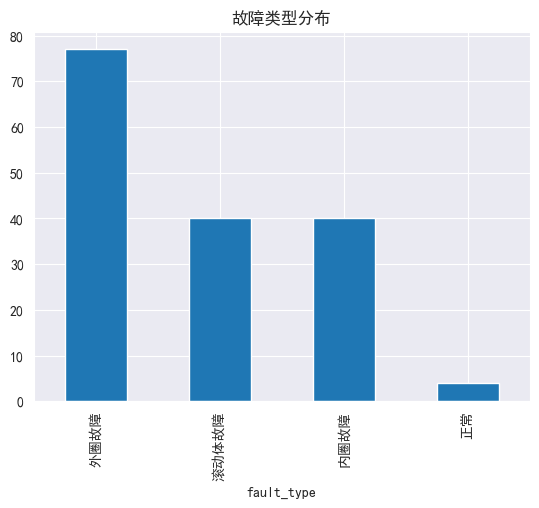

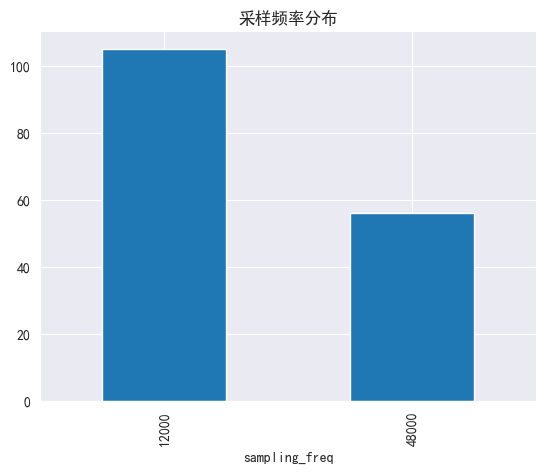

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

fault_counts = df["fault_type"].value_counts()
fault_counts.plot(kind="bar",title ='故障类型分布')
plt.show()

freq_counts = df['sampling_freq'].value_counts()
freq_counts.plot(kind="bar",title ='采样频率分布')
plt.show()



#加载signal

In [3]:
import scipy.io as sio
import numpy as np


def load_signal_from_mat(file_path, bearing_type=None):
    """
    根据 bearing_type ('DE', 'FE', 'BA'/'Normal') 提取对应信号
    如果找不到对应信号，则尝试文件中第一个 DE/FE/BA 信号
    返回一维 numpy 数组
    """
    mat_dict = sio.loadmat(file_path)
    signal = None

    # 构建优先级
    key_order = []
    if bearing_type:
        bt = bearing_type.upper()
        if bt == "DE":
            key_order.append("DE")
        elif bt == "FE":
            key_order.append("FE")
        elif bt in ["BA", "NORMAL"]:
            key_order.append("BA")

    # 遍历键找到第一个匹配的 numpy 信号
    for k in key_order:
        keys = [key for key in mat_dict.keys() if k in key.upper()]
        for key in keys:
            if isinstance(mat_dict[key], np.ndarray):
                signal = mat_dict[key].squeeze()
                break
        if signal is not None:
            break

    if signal is None:
        for key in mat_dict.keys():
            if not key.startswith("__") and isinstance(mat_dict[key], np.ndarray):
                signal = mat_dict[key].squeeze()
                break

    return signal

# 在 DataFrame 中新增 signal 列
df["signal"] = df.apply(lambda row: load_signal_from_mat(row["file_path"], row.get("bearing_type")), axis=1)

# 检查
print("信号列是否有空值:", df["signal"].isna().sum())
display(df)


信号列是否有空值: 0


,file_path,filename,sampling_freq,bearing_type,bearing_model,fault_type,fault_size,load,signal
0,E:/python_file/TransBearingDiag/src/data/sourc...,B007_0.mat,12000,DE,SKF6205,滚动体故障,007,0,"[0.19612209317762153, -0.010495391852318566, -..."
1,E:/python_file/TransBearingDiag/src/data/sourc...,B007_1.mat,12000,DE,SKF6205,滚动体故障,007,1,"[0.16097982148905385, -0.11710912062671461, -0..."
2,E:/python_file/TransBearingDiag/src/data/sourc...,B007_2.mat,12000,DE,SKF6205,滚动体故障,007,2,"[-0.101050582052191, -0.13028890540548438, 0.1..."
3,E:/python_file/TransBearingDiag/src/data/sourc...,B007_3.mat,12000,DE,SKF6205,滚动体故障,007,3,"[-0.16744701037262077, -0.15006645149038525, 0..."
4,E:/python_file/TransBearingDiag/src/data/sourc...,B014_0.mat,12000,DE,SKF6205,滚动体故障,014,0,"[0.11470197259011841, -0.19165068210050032, -0..."
...,...,...,...,...,...,...,...,...,...
156,E:/python_file/TransBearingDiag/src/data/sourc...,OR021@6_3.mat,48000,DE,SKF6205,外圈故障,021,3,"[0.26794814633205555, -0.006657187001277789, -..."
157,E:/python_file/TransBearingDiag/src/data/sourc...,N_0.mat,48000,Normal,None,正常,None,0,"[0.04063871187697756, 0.07610332726159295, 0.0..."
158,E:/python_file/TransBearingDiag/src/data/sourc...,N_1_(1772rpm).mat,48000,Normal,None,正常,None,(1772rpm),"[0.06483220523884395, 0.05940820523884394, 0.0..."
159,E:/python_file/TransBearingDiag/src/data/sourc...,N_2_(1750rpm).mat,48000,Normal,None,正常,None,(1750rpm),"[0.09934862958419834, 0.0688907834303522, 0.05..."


<Axes: >

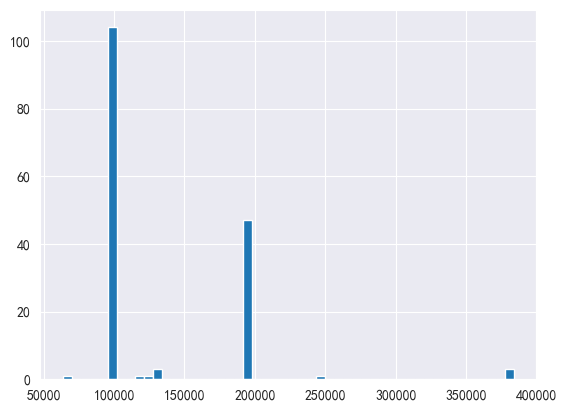

In [4]:
df['signal_length'] = df['signal'].apply(len)
df['signal_length'].hist(bins=50)


In [5]:
from config.paths import PICKLE_PATHS
import os

pickle_file = os.path.join(PICKLE_PATHS, "df_with_signal.pkl")
df.to_pickle(pickle_file)

